In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#pandasでcsv読み込み
df = pd.read_csv("/workspaces/studypython/src/ゼミ/data/オートバイ衝突実験データ.csv")
df

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


In [ ]:
#節点を作る
def create_knot(df, m):
    #x_1からx_mまでの節点
    pre_knot = np.linspace(
        start=df.iat[0, 0], stop=df.iat[df.shape[0] - 1, 0], num=m - 2, retstep=True #startからstopまでnum個に分けてretstep=Trueで間隔を出力[knot,retstep]のリストになる
    )
    #左と右にもう3つ節点作る
    start = np.linspace(df.iat[0, 0] - 3 * pre_knot[1], df.iat[0, 0] - pre_knot[1], 3)
    end = np.linspace(
        df.iat[df.shape[0] - 1, 0] + pre_knot[1],
        df.iat[df.shape[0] - 1, 0] + 3 * pre_knot[1],
        3,
    )
    knot = np.append(start, pre_knot[0])
    knot = np.append(knot, end)
    return knot

In [ ]:
#Bスプラインの基底関数作成
def b_spline(knot, j, x, r):
    if r == 0:
        if knot[j] <= x < knot[j + 1]:
            return 1
        else:
            return 0
    else:
        return (x - knot[j]) * b_spline(knot, j, x, r - 1) / (knot[j + r] - knot[j]) + (
            knot[j + r + 1] - x
        ) * b_spline(knot, j + 1, x, r - 1) / (knot[j + r + 1] - knot[j + 1])

In [156]:
basis_num = 20
x = df.iloc[:, 0]
y = np.array([df.iloc[:, 1]]).T
knot = create_knot(df, basis_num)
# beta_0 = 0.0000005
x_10000 = np.linspace(knot[0], knot[-1], 10000)
def culc_X(beta_0):
    B = np.zeros((df.shape[0], basis_num))
    X = np.zeros((len(x_10000), basis_num))

    for i in range(len(x_10000)):
        for j in range(basis_num):
            X[i][j] = b_spline(knot, j, x_10000[i], 3)

    for i in range(df.shape[0]):
        for j in range(basis_num):
            B[i][j] = b_spline(knot, j, x[i], 3)

    # y_hat=B@np.linalg.inv((B.T@B+beta_0*np.identity(basis_num)))@B.T@y
    y_hat_graph=X@np.linalg.inv(B.T@B+beta_0*np.identity(basis_num))@B.T@y
    return y_hat_graph


#ラムダの値
# sigma_hat=(y-y_hat).T@(y-y_hat)/df.shape[0]
# lamda=beta_0/sigma_hat

# lamda

2952.2407

13.4486

0.004565

0.0000005

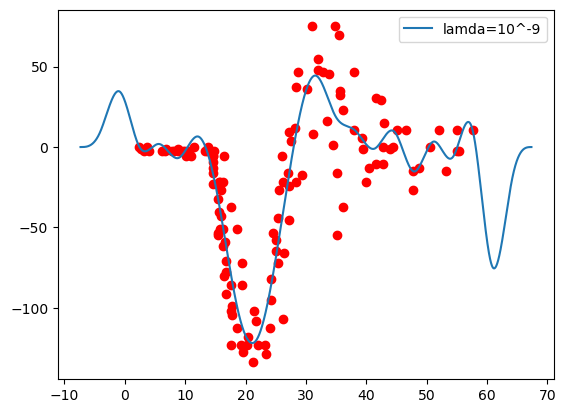

In [153]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x_10000,y_hat_graph,label="lamda=10^-9")
ax.scatter(df.iloc[:,0],df.iloc[:,1],color="red")
plt.legend()
plt.show()

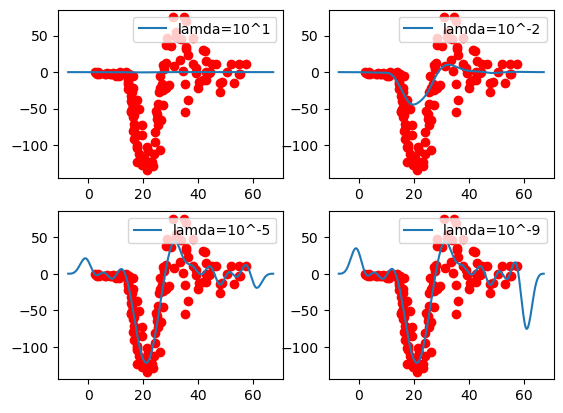

In [158]:
beta=np.array([2952.2407,13.4486,0.004565,0.0000005])
lamda_num=np.array([1,-2,-5,-9])
fig=plt.figure()

for i in range(4):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(x_10000,culc_X(beta[i]),label="lamda=10^{}".format(lamda_num[i]))
    ax.scatter(df.iloc[:,0],df.iloc[:,1],color="red")
    plt.legend()
plt.show()
